In [1]:
PROJECT_PATH = "/Users/shawn/Documents/personal/rsi_divergence_detector"
import sys
import pandas as pd
sys.path.append(f"{PROJECT_PATH}")

In [2]:
# df_total = pd.read_csv(f"{PROJECT_PATH}/data/training_data.csv")
# df_total.head(3)

# df_15m = df_total[df_total.timeframe == '15m']
# df_15m_filter = df_15m[(df_15m.datetime >'2024-11-21 00:30:00') & (df_15m.datetime < '2024-11-22 20:00:00')]

# df_15m_filter['datetime'] = pd.to_datetime(df_15m_filter.datetime, format='mixed')
# if df_15m_filter.index.dtype == 'int64':
#     df_15m_filter.set_index('datetime', inplace=True)

# pd.to_pickle(df_15m_filter, f"{PROJECT_PATH}/data/df_15m_filter_test.pickle")

In [9]:
df_15m_filter = pd.read_pickle(f"{PROJECT_PATH}/data/df_15m_filter_test.pickle")
df_15m_filter

,timestamp,open,high,low,close,volume,timeframe,rsi,macd,macd_signal,...,future_return_zscore_56,label_56,future_return_zscore_57,label_57,future_return_zscore_58,label_58,future_return_zscore_59,label_59,future_return_zscore_60,label_60
datetime,,,,,,,,,,,,,,,,,,,,,
2024-11-21 00:45:00,1732149900000,94864.00,94925.66,94600.00,94709.61,363.25806,15m,60.245786,172.997189,112.896388,...,0.834236,1,0.777397,1,0.492229,0,0.515755,1,0.668335,1
2024-11-21 01:00:00,1732150800000,94709.62,94926.57,94596.00,94870.19,235.00131,15m,62.849697,195.867270,129.490564,...,0.724002,1,0.437140,0,0.461266,0,0.615367,1,0.633721,1
2024-11-21 01:15:00,1732151700000,94870.20,94977.00,94700.00,94900.00,433.25954,15m,63.329884,213.931326,146.378716,...,0.430626,0,0.454994,0,0.610422,1,0.628935,1,0.769690,1
2024-11-21 01:30:00,1732152600000,94900.00,94909.10,94674.24,94823.14,231.89439,15m,61.135734,219.514829,161.005939,...,0.489016,0,0.645651,1,0.663956,1,0.805719,1,0.817942,1
2024-11-21 01:45:00,1732153500000,94823.14,94887.03,94651.55,94702.49,181.13978,15m,57.753177,211.763274,171.157406,...,0.698328,1,0.716302,1,0.858966,1,0.870802,1,0.842600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22 18:45:00,1732301100000,98933.89,99174.00,98828.00,99108.87,427.42474,15m,58.511191,168.520556,108.173158,...,-0.272556,0,-0.278429,0,-0.275973,0,-0.276907,0,-0.266611,0
2024-11-22 19:00:00,1732302000000,99108.87,99384.62,99073.22,99212.12,748.24011,15m,59.983694,188.468449,124.232217,...,-0.316912,0,-0.314060,0,-0.314617,0,-0.303890,0,-0.274808,0
2024-11-22 19:15:00,1732302900000,99212.13,99400.00,99041.11,99361.50,723.13520,15m,62.080575,213.865705,142.158914,...,-0.369089,0,-0.369117,0,-0.357772,0,-0.327980,0,-0.386918,0


In [10]:
divergence_data = pd.read_pickle(f"{PROJECT_PATH}/data/divergence_data.pickle")
divergence_15m = divergence_data['15m']
divergence_15m[-10:]

,start_datetime,entry_datetime,entry_price,previous_peak_datetime,divergence,price_change,rsi_change,future_return,TP,SL
end_datetime,,,,,,,,,,
2024-11-11 12:00:00,2024-11-10 05:15:00,2024-11-11 12:30:00,82117.99,2024-11-09 19:30:00,Bearish Divergence,-521.20,-11.925455,-0.006320,80043.51360,82471.20
2024-11-11 17:30:00,2024-11-10 05:15:00,2024-11-11 18:00:00,84603.99,2024-11-09 19:30:00,Bearish Divergence,952.62,3.343651,0.011223,81532.17054,84880.03
2024-11-11 19:30:00,2024-11-10 05:15:00,2024-11-11 20:00:00,86102.21,2024-11-09 19:30:00,Bearish Divergence,855.60,-3.268844,0.009888,82552.40820,86530.90
2024-11-11 21:15:00,2024-11-10 05:15:00,2024-11-11 21:45:00,87940.00,2024-11-09 19:30:00,Bearish Divergence,-1133.49,-19.574045,-0.012825,83693.91600,88378.00
2024-11-11 23:00:00,2024-11-10 05:15:00,2024-11-11 23:30:00,88906.98,2024-11-09 19:30:00,Bearish Divergence,-1529.54,-16.801245,-0.017084,84406.18572,89530.54
2024-11-13 18:45:00,2024-11-13 17:00:00,2024-11-13 19:15:00,90890.01,2024-11-13 06:30:00,Bearish Divergence,-2312.50,-20.575043,-0.024828,90461.36892,93139.93
2024-11-21 11:00:00,2024-11-21 04:45:00,2024-11-21 11:30:00,98020.00,2024-11-21 02:30:00,Bearish Divergence,-210.14,-8.999935,-0.002136,96725.12348,98384.86
2024-11-22 07:30:00,2024-11-21 04:45:00,2024-11-22 08:00:00,99173.70,2024-11-21 02:30:00,Bearish Divergence,-464.08,-17.555495,-0.004668,97364.83382,99419.99
2024-12-02 16:00:00,2024-12-01 08:45:00,2024-12-02 16:30:00,96599.99,2024-12-01 02:45:00,Bearish Divergence,-1032.69,-28.228378,-0.010607,96721.49658,97356.69


Datetime 2024-12-01 08:45:00 not in DataFrame index. Skipping.
Datetime 2024-12-02 16:00:00 not in DataFrame index. Skipping.
Datetime 2024-12-01 02:45:00 not in DataFrame index. Skipping.
Datetime 2024-12-02 16:30:00 not in DataFrame index. Skipping.
KeyError: Timestamp('2024-12-01 02:45:00') for divergence at index 2024-12-02 16:00:00. Skipping.


/Users/shawn/Documents/personal/rsi_divergence_detector/src/data_process/visualization.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


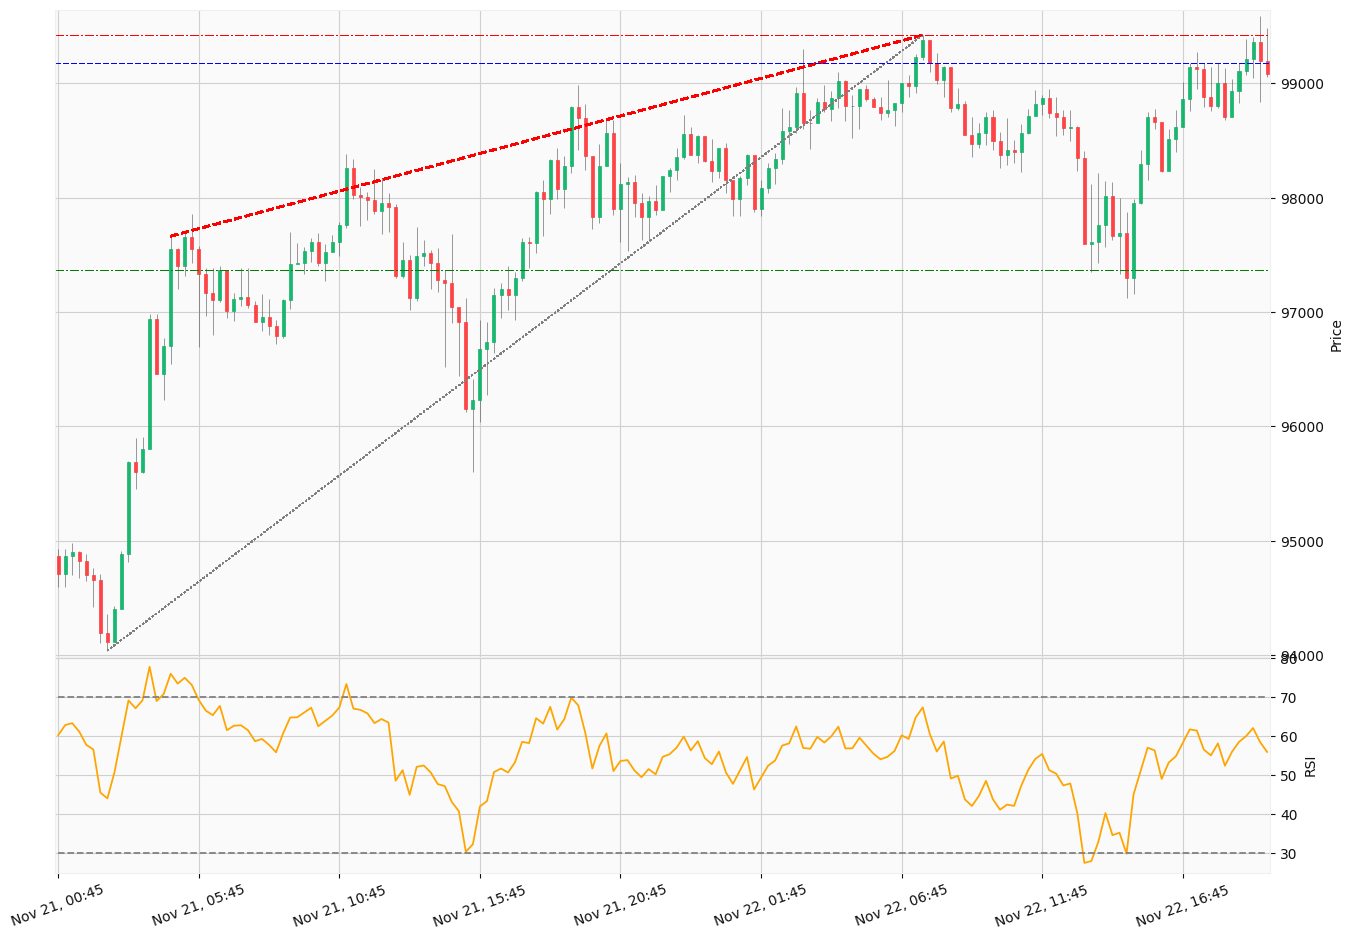

In [12]:
from src.data_process.visualization import Visualizer
visualizer = Visualizer
visualizer.plot_divergence(df_15m_filter, divergence_15m[-3:-1])

In [25]:
from src.data_process.data_labeler import DataLabeler

In [27]:
df_total = pd.read_pickle(f"{PROJECT_PATH}/data/training_data.pickle")
df_5m = df_total.loc[df_total.timeframe == '5m']
print(len(df_5m), len(divergence_15m))
df_5m.tail(3)

767098 1275


,timestamp,open,high,low,close,volume,timeframe,rsi,macd,macd_signal,...,willr,cci,atr,return_1,return_5,return_10,volatility_5,volatility_10,volume_change,volume_rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2024-12-08 22:25:00,1733696700000,99976.01,100030.85,99942.03,99996.01,49.61363,5m,53.356511,36.488813,36.522007,...,-30.757731,3.760954,96.952146,0.000200,0.000120,-0.000453,0.000804,0.000615,1.725037,38.982778
2024-12-08 22:30:00,1733697000000,99996.02,100017.37,99988.63,100017.36,19.39978,5m,54.640575,36.436189,36.504844,...,-29.146579,33.956681,92.079850,0.000214,0.000174,0.000130,0.000806,0.000608,-0.608983,32.512112
2024-12-08 22:35:00,1733697300000,100017.36,100025.00,100017.36,100024.99,4.64707,5m,55.116126,36.588394,36.521554,...,-25.233357,67.982462,86.048432,0.000076,0.000680,0.000460,0.000764,0.000601,-0.760458,27.761544


In [28]:
dl = DataLabeler(price_data = df_5m)
dl.label_divergence_data(divergence_df=divergence_15m)

ValueError: too many values to unpack (expected 2)

In [30]:
for _, row2 in self.price_df[self.price_df.index >= entry_datetime].iterrows():
    break

In [31]:
row2

timestamp              1733518800000
open                        101360.0
high                       101449.99
low                         101248.0
close                      101264.94
volume                     104.34672
timeframe                         5m
rsi                        46.405241
macd                      104.098695
macd_signal               197.861626
macd_hist                  -93.76293
ema_12                 101498.495254
ema_26                 101394.396558
bb_upper                101856.98297
bb_middle                  101433.38
bb_lower                101009.77703
adx                        23.667153
willr                     -75.214415
cci                      -115.166631
atr                       257.649012
return_1                   -0.000938
return_5                   -0.004778
return_10                  -0.003946
volatility_5                0.001969
volatility_10               0.001473
volume_change              -0.375888
volume_rolling_mean       144.662038
N